# Breathing in Data: Predictive Analysis of Lung Cancer Risk Factors

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV


In [64]:
data = pd.read_csv("survey lung cancer.csv")

# Selection of Variables

GENDER : M [Male] , F [Female]
AGE : Age of patients
SMOKING : 2 [Yes] , 1 [No]
YELLOW_FINGERS : 2 [Yes] , 1 [No]
ANXIETY : 2 [Yes] , 1 [No]
PEER_PRESSURE : 2 [Yes] , 1 [No]
CHRONIC DISEASE : 2 [Yes] , 1 [No]
FATIGUE : 2 [Yes] , 1 [No]
ALLERGY : 2 [Yes] , 1 [No]
WHEEZING : 2 [Yes] , 1 [No]
ALCOHOL CONSUMING : 2 [Yes] , 1 [No]
COUGHING : 2 [Yes] , 1 [No]
SHORTNESS OF BREATH : 2 [Yes] , 1 [No]
SWALLOWING DIFFICULTY : 2 [Yes] , 1 [No]
CHEST PAIN : 2 [Yes] , 1 [No]
LUNG_CANCER : YES [Positive] , NO [Negative]

# Chosen Variables and insights to choosing them

1. Smoking

Smoking is the most well-documented and significant risk factor for lung cancer. It is responsible and a key factor of lung cancer cases. The carcinogens in tobacco smoke damage the cells lining the lungs, and over time, the damage can cause cells to act abnormally and develop into cancer.

2. Alcohol Consumption (consuming)

Excessive alcohol consumption can lead to behaviors and physiological changes that indirectly increase lung cancer risk. For example, heavy drinkers might also be smokers, and alcohol can impair the body's ability to metabolize and clear carcinogens. Hence, we have chosen alcohol due to its potential relation with smoking.

3. Fatigue

Fatigue in the context of lung cancer could be a symptom reflecting the body’s response to the developing disease. It may also signal other underlying health problems that could be contributing factors, such as sleep apnea or poor oxygenation.

4. Chronic Disease

Chronic Diseases might play a big key role in prediction due to its common risk factors it has with lung cancer such as smoking. These conditions may exacerbate the risk of developing lung cancer or complicate its management.

5. Coughing

Chronic coughing is a common symptom of lung cancer, often caused by the irritation of air passages or even the presence of a tumor. Studying the patterns and severity of coughing can provide early diagnostic clues.

# Cleaning the dataset

After having analysed the data, we will need to clean the data set with better representation for our data analysis and eventaully our machine learning prediction. These are some of the changes made below in allowing for a better and deeper understanding, plus a better use of the dataset as well.

-Swapping the numerical Values of 1 and 2 to be replaced by Yes and No for easier interpretation and understanding
-replace "M" and "F" by "Male" and "Female" accordingly in "GENDER" column as well for better representation
-Removing of NUll and Duplicate values

In [65]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


# Color Scheming for better representation of data visulisations

In [66]:
palette = [
    "#4E79A7",  # Bluish
    "#F28E2B",  # Orangish
    "#E15759",  # Reddish
    "#76B7B2",  # Cyan
    "#59A14F",  # Green
    "#EDC948",  # Yellow
    "#B07AA1",  # Purple
    "#FF9DA7",  # Pink
    "#9C755F",  # Brown
    "#BAB0AC",  # Gray
    "#6A3D9A",  # Deep purple
    "#FF7F00",  # Deep orange
    "#B15928",  # Brick
    "#1F77B4"   # Deep blue
]


sns.set_style("whitegrid")
sns.set_context("poster", font_scale=.7)
sns.set_palette(palette)  # Set the custom color palette
plt.show()

# Filtering Out Positive Cases

By isolating the positive cases out, we are able to see the characteristics and exposure toward these risk factors. This helps in identifying specific risk factors or patterns that are more prevalent in the affected population compared to those who do not have the disease.

In [67]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


# Positive Cases Distribution by Age

Lung cancer risk increases with age due to prolonged exposure and effects of cellular damage over time. Analyzing how this risk manifests across different age groups can help in identifying key age ranges that are particularly vulnerable.


We will also split the Distributions by Age, split into both genders. Men and women may have different biological susceptibilities to lung cancer. For instance, some studies suggest that women might be more susceptible to the carcinogenic effects of certain types of tobacco and other lung carcinogens than men, even if exposed to lower levels. Gender differences in the presentation of lung cancer symptoms might require different approaches in screening and diagnostics to improve early detection rates.

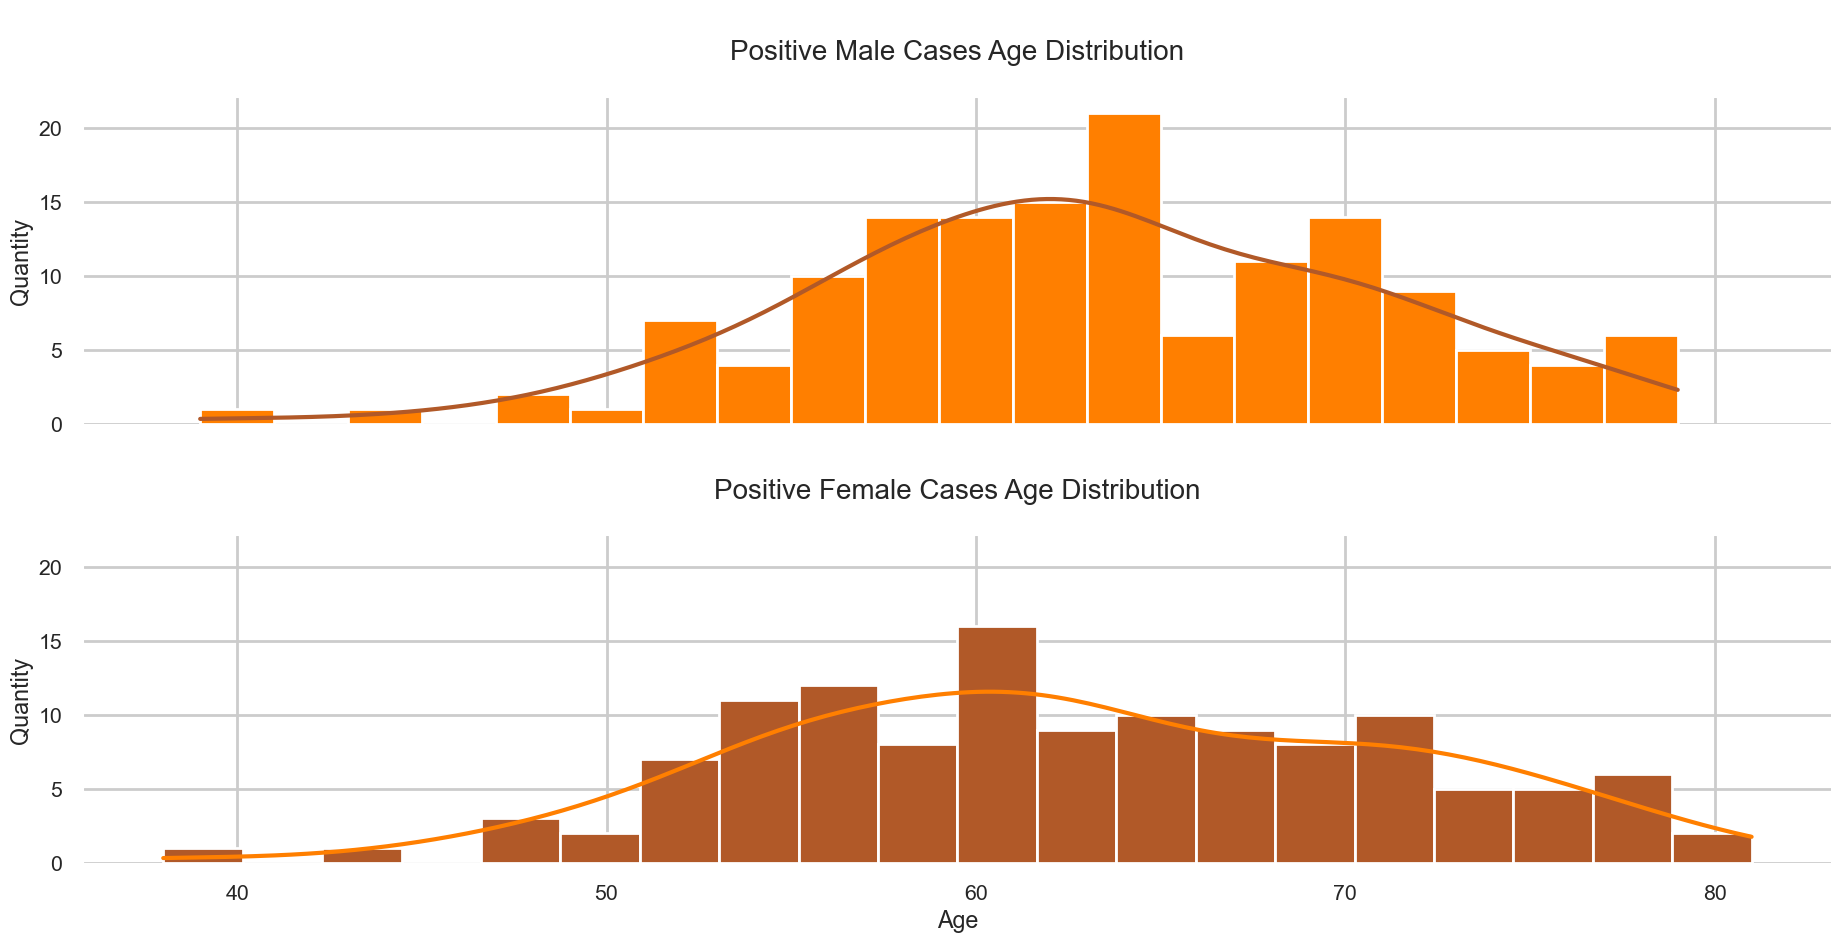

In [68]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

Both histograms show an increase in the number of lung cancer cases as age increases, up to a certain point, before the number of cases begins to decrease.

This is consistent with the understanding that lung cancer risk increases with age due to longer exposure to risk factors. It aligns with our expectations

# Merging Genders for Age Distribution

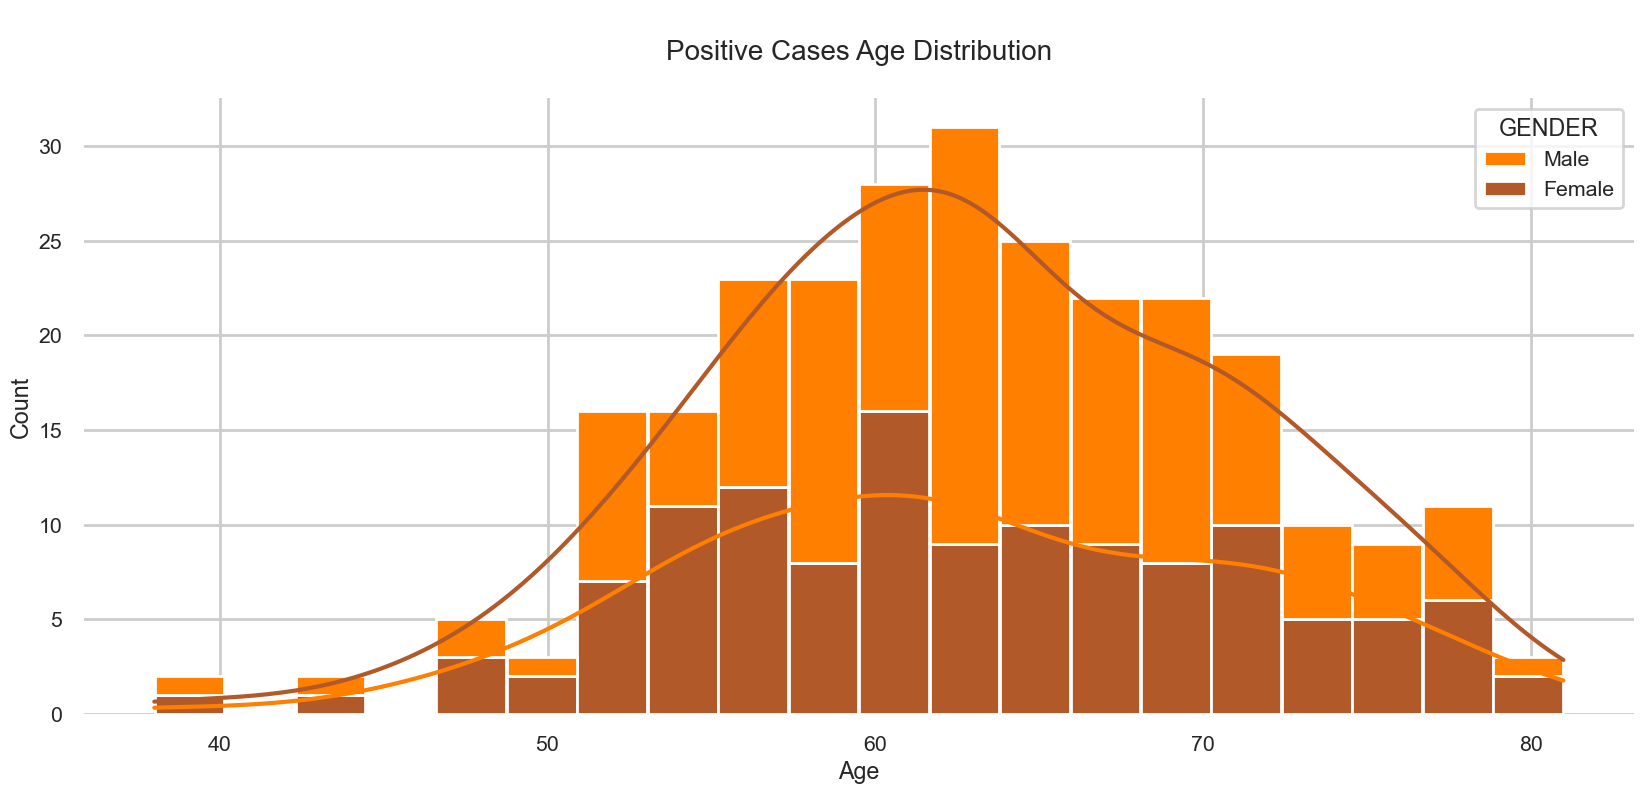

In [69]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

To give a better visualisation, the two distributions are merged to compare based on the ages and increase.

# Analysing Each Data Variable

When exploring data variables and plotting charts in the context of a study on lung cancer, we aim to understand the relationships, patterns, and distributions that exist within the dataset. By exploring each variable and using appropriate visualizations, we can extract meaningful insights, identify patterns and outliers, and make data-driven decisions will allow us to find out more on which variables serve a deeper purpose toward prediction for lung cancer. Each chart serves to break down complex data into understandable and actionable information.

We will take a look at out first 2 variables which we think would be the most impactful towards machine learning.

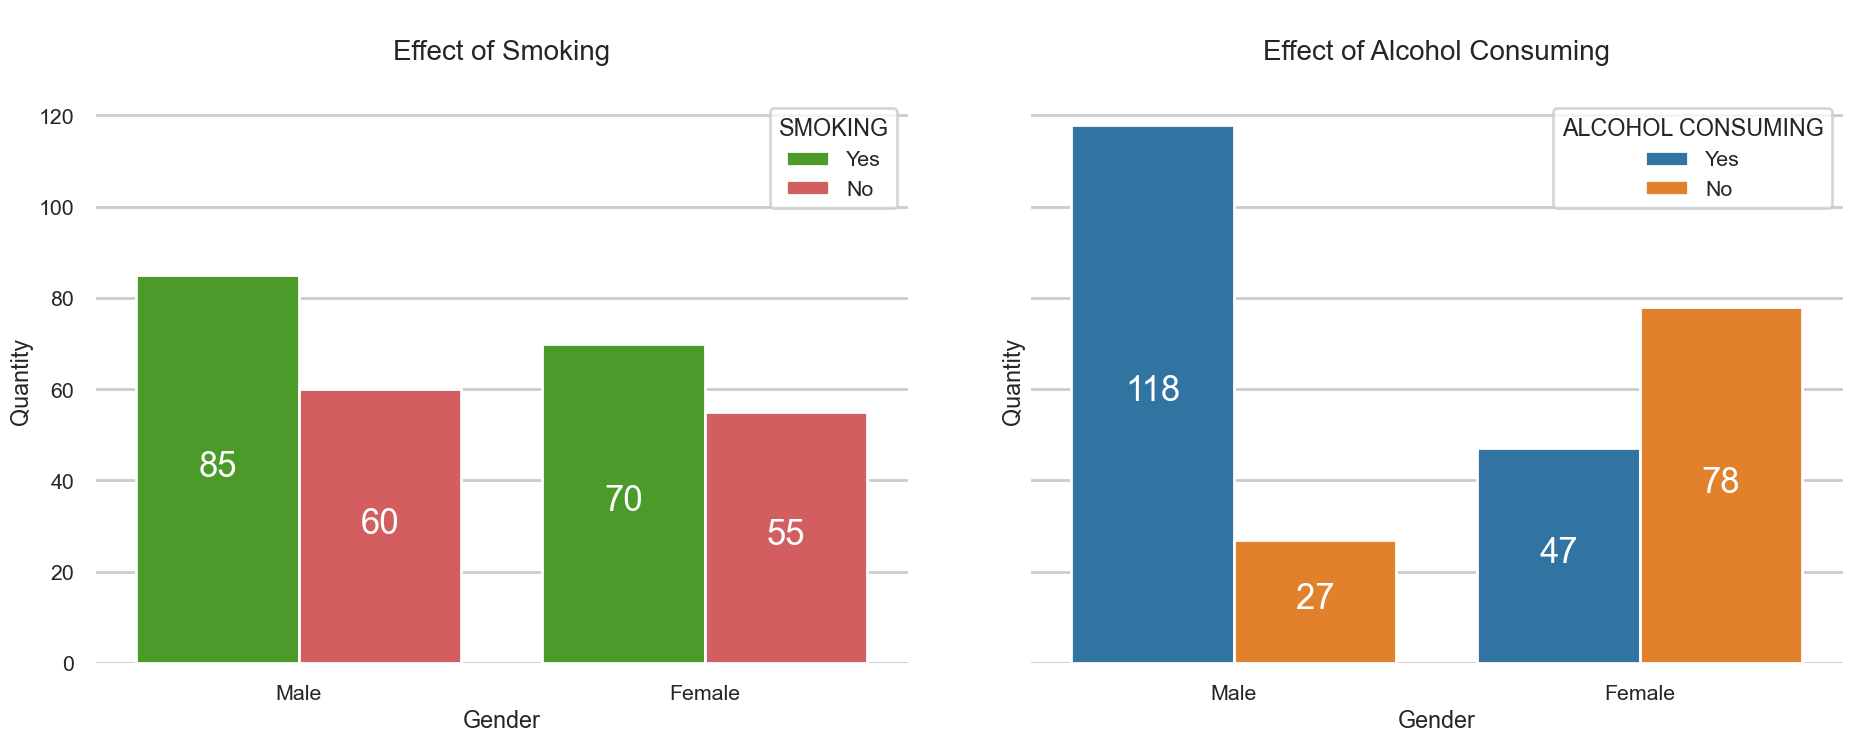

In [70]:
# Setup for figure and subplots
_, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

# Plotting the effect of smoking on gender
sns.countplot(data=data_temp_pos, x="GENDER", hue="SMOKING", hue_order=["Yes", "No"],
              ax=axs[0], palette=["#4C9A2A", "#D35E60"], saturation=1)  # Green and red
axs[0].set_title("\nEffect of Smoking\n", fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container, label_type="center", padding=2, size=25, color="white", rotation=0)

# Plotting the effect of alcohol consumption on gender
sns.countplot(data=data_temp_pos, x="GENDER", hue="ALCOHOL CONSUMING", hue_order=["Yes", "No"],
              ax=axs[1], palette=["#3274A1", "#E1812C"], saturation=1)  # Blue and orange
axs[1].set_title("\nEffect of Alcohol Consuming\n", fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container, label_type="center", padding=2, size=25, color="white", rotation=0)

# Removing spines for a cleaner look
sns.despine(left=True, bottom=True)
plt.show()


## For Smoking

There are more male smokers (85) than female smokers (70) in the dataset, which is consistent with global trends where smoking prevalence is typically higher among males.
Assuming these figures relate to lung cancer cases, the higher number of smoking males with lung cancer underscores smoking as a significant risk factor, especially in males.
For females, the numbers of smokers and non-smokers with lung cancer are closer. This might suggest that while smoking is still a risk factor, other factors might also play a significant role in lung cancer incidence among females.

## For Alcohol Consuming 

A significantly higher number of males (118) consume alcohol compared to females (47), reflecting common gender differences in alcohol consumption habits.
The data doesn’t show as clear a correlation between alcohol consumption and lung cancer as is evident with smoking, especially in female cases.
The chart could suggest that alcohol consumption is a less significant factor in lung cancer incidence than smoking, though it is important to note that alcohol consumption might be associated with other risky behaviors, such as smoking.

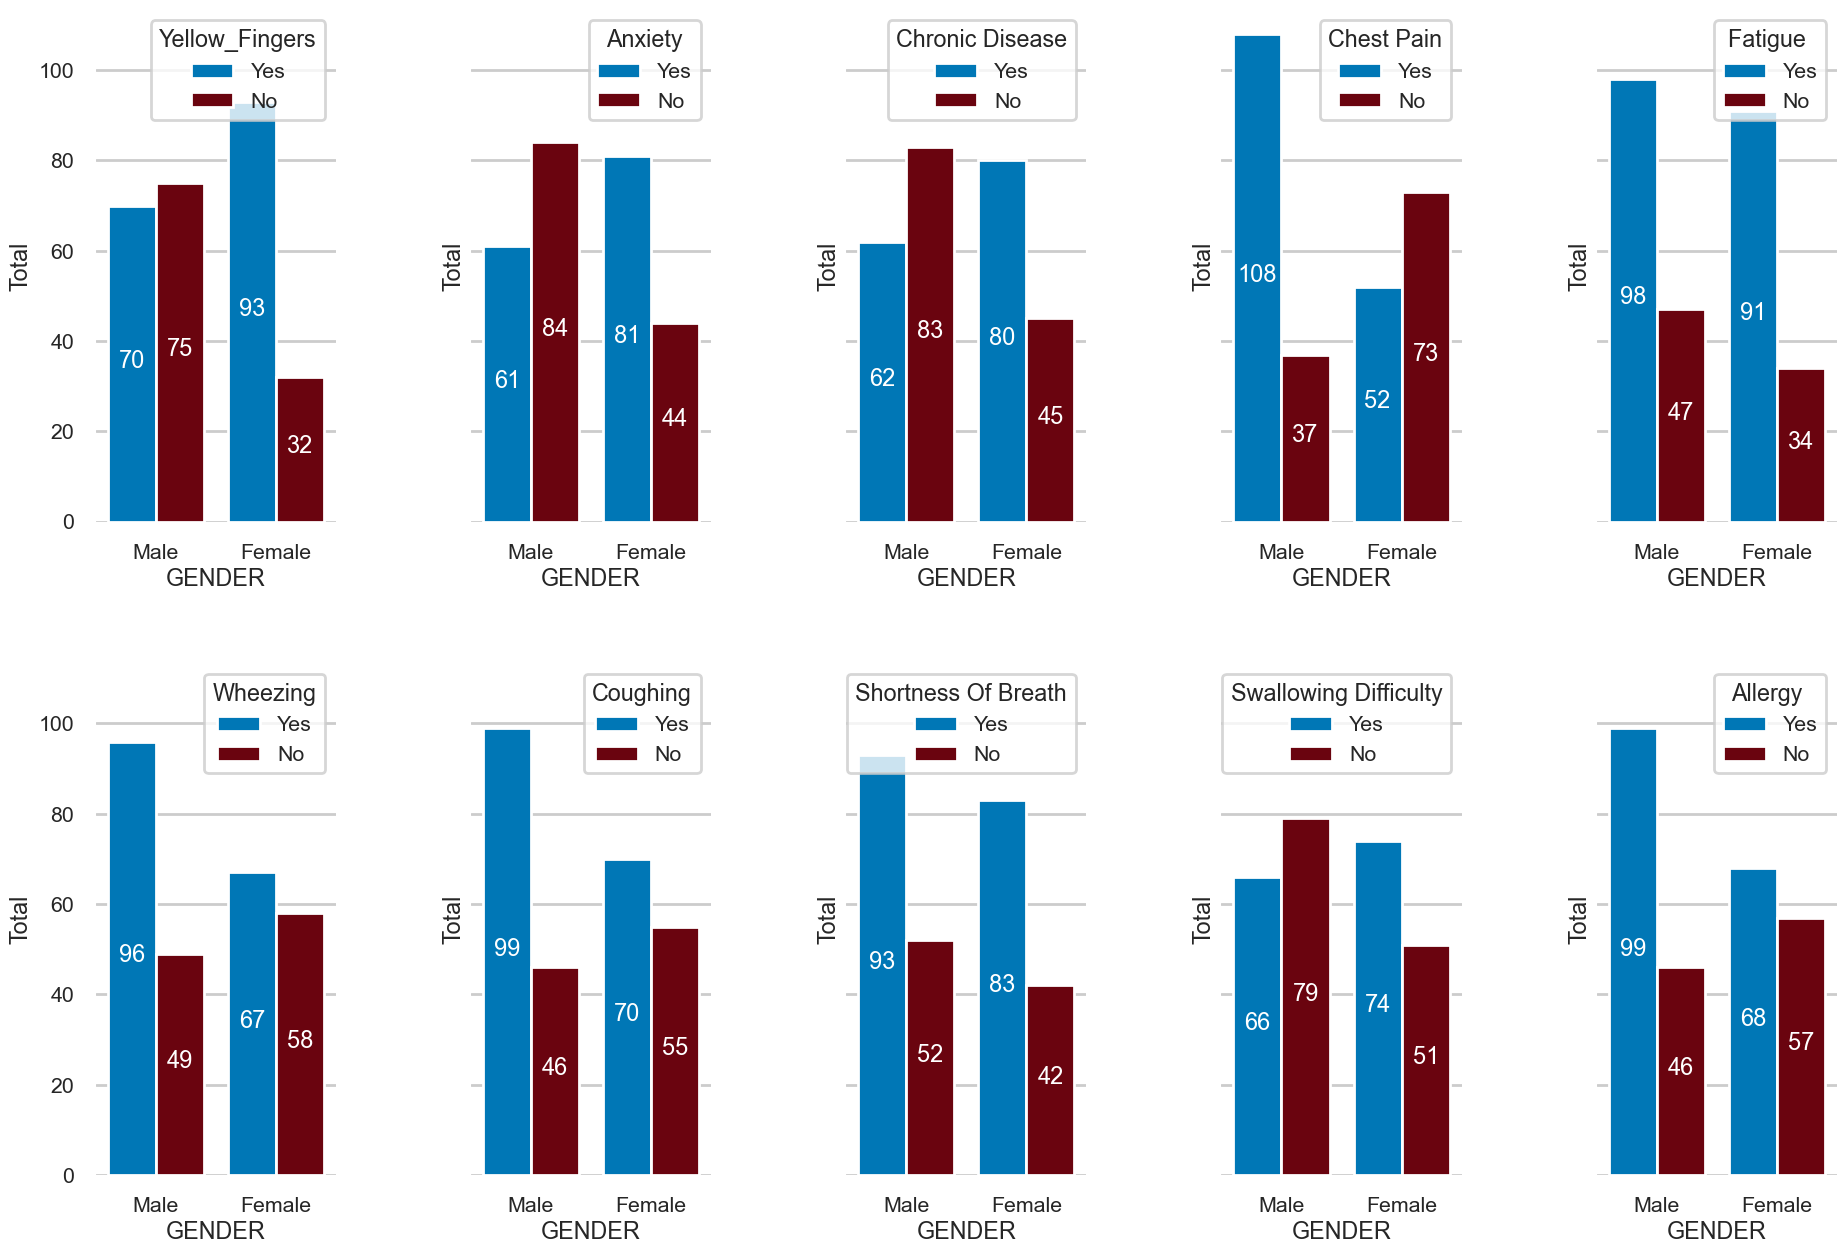

In [71]:
# Setup for figure and subplots
_, axs = plt.subplots(2, 5, figsize=(20, 14), sharex=False, sharey=True)
plt.tight_layout(pad=4.0)

# Define a new color palette
yes_color = "#0077b6"  # A calming blue
no_color = "#6a040f"  # A deep burgundy

# Plot configurations for different symptoms
symptoms = ["YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "CHEST PAIN", "FATIGUE ", 
            "WHEEZING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "ALLERGY "]
positions = [(i, j) for i in range(2) for j in range(5)]  # positions in the grid

for (i, j), symptom in zip(positions, symptoms):
    sns.countplot(data=data_temp_pos, x="GENDER", hue=symptom, hue_order=["Yes", "No"],
                  ax=axs[i, j], palette=[yes_color, no_color], saturation=1)
    axs[i, j].set_ylabel("Total")
    axs[i, j].legend(title=symptom.title(), loc="upper right")
    for container in axs[i, j].containers:
        axs[i, j].bar_label(container, label_type="center", padding=2, size=17, color="white", rotation=0)

sns.despine(left=True, bottom=True)
plt.show()


Taken together, the data shows a range of symptoms and conditions that are crucially relevant to lung health. The presence of respiratory symptoms, alongside systemic signs like fatigue and anxiety, points to a population that may be at heightened risk for lung conditions. Chronic diseases and lifestyle factors such as smoking, as indicated by yellow fingers, further emphasize the need for comprehensive healthcare strategies addressing prevention, early detection, and management of lung-related health issues.

# HeatMap and Co-relation Matrix for positive lung cancer cases

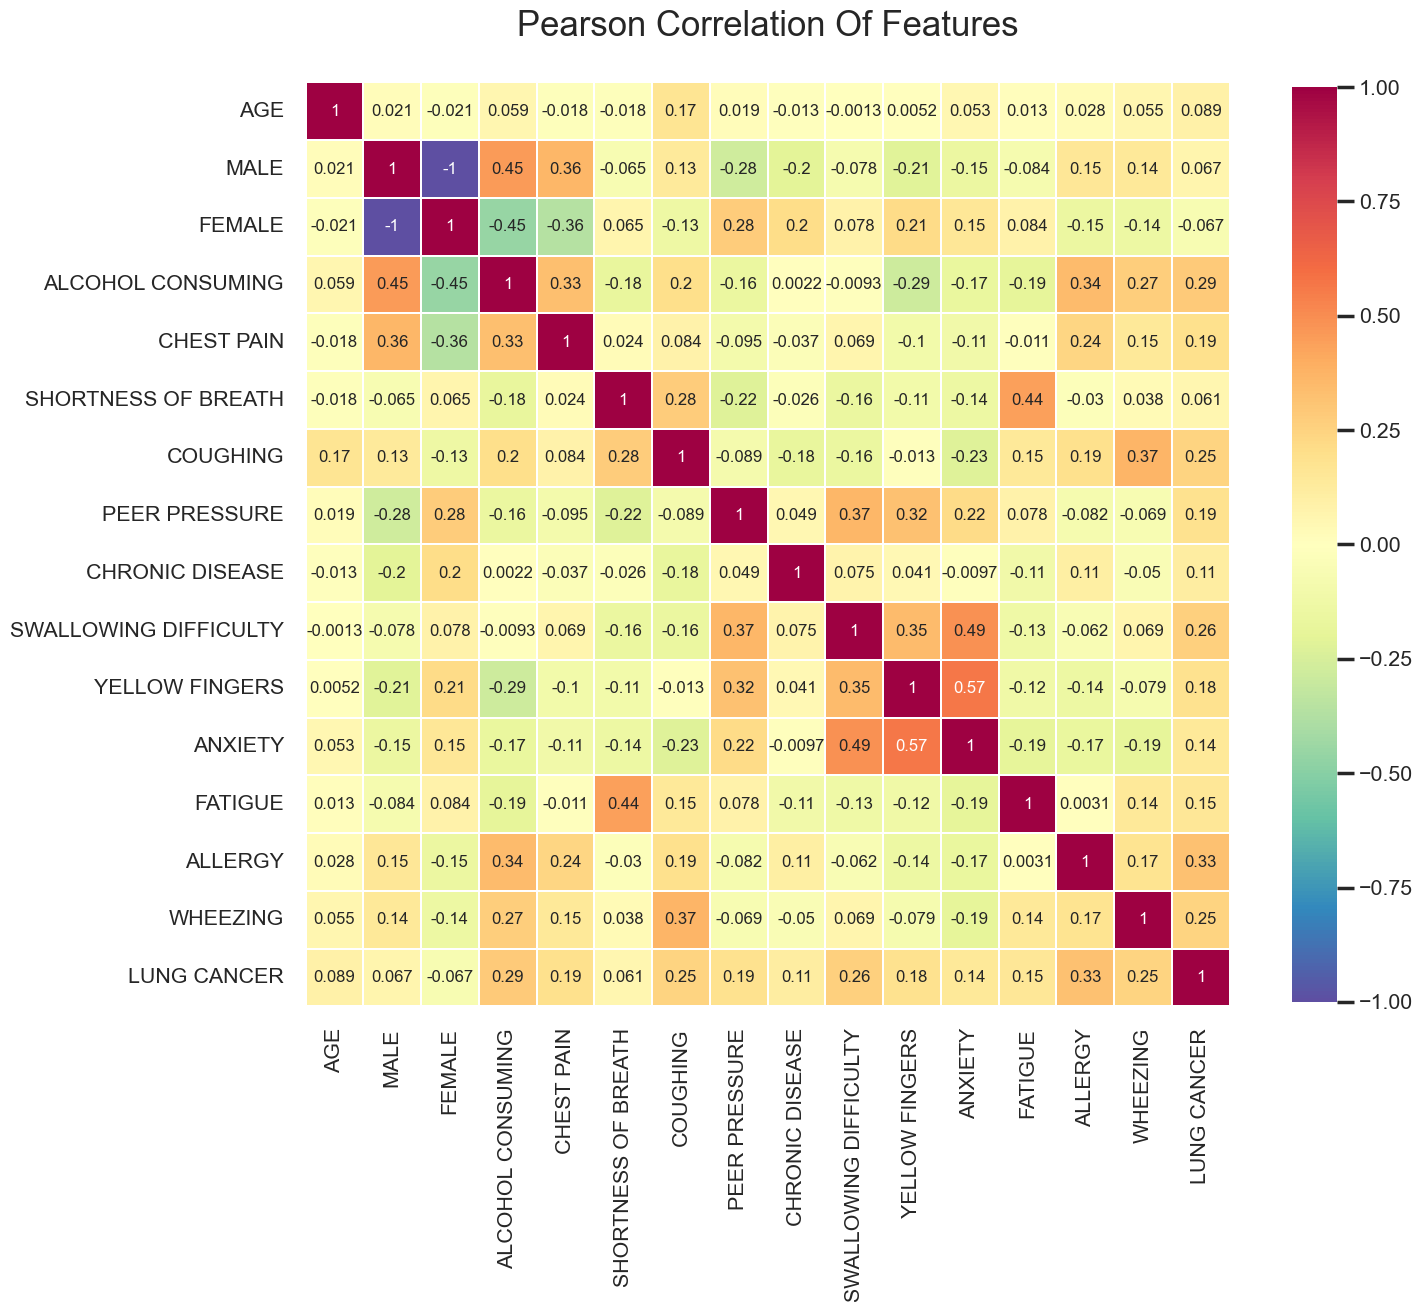

In [72]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

# Assuming your DataFrame 'data' is already defined and prepared as above
plt.subplots(figsize=(16, 12))

# Using the 'Spectral' palette for the heatmap, adjusted to a darker tone
p = sns.heatmap(data.corr(), cmap='Spectral_r', square=True, cbar_kws={"shrink": 0.99},
                annot=True, vmin=-1, vmax=1, linewidths=0.1, linecolor='white', annot_kws={"fontsize": 12})
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()


# Logistic Regression

This type of regression is particularly suited for instances where the outcome of interest is categorical, which is the case here for our dataset.

In the context of a dataset indicating the prevalence of lung cancer, logistic regression not only provides the probability of whether an individual might have lung cancer based on our set of variables but also allows us to determine what increase the likelihood of lung cancer given the changes in predictor variables.

The model’s capacity to handle non-linearity between the dependent and independent variables is also a significant advantage. This characteristic is particularly beneficial when dealing with symptoms and risk factors that do not have a straightforward linear correlation with the disease outcome. Thus,with our current dataseet, we decided that logistic regression is best suited.


C:\Users\zheng\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Top 5 5 variables:
                  Feature  Coefficient  Absolute Coefficient
3       ALCOHOL CONSUMING     1.444190              1.444190
13                ALLERGY     1.332353              1.332353
12                FATIGUE     1.239343              1.239343
11                ANXIETY     1.049302              1.049302
9   SWALLOWING DIFFICULTY     1.032584              1.032584


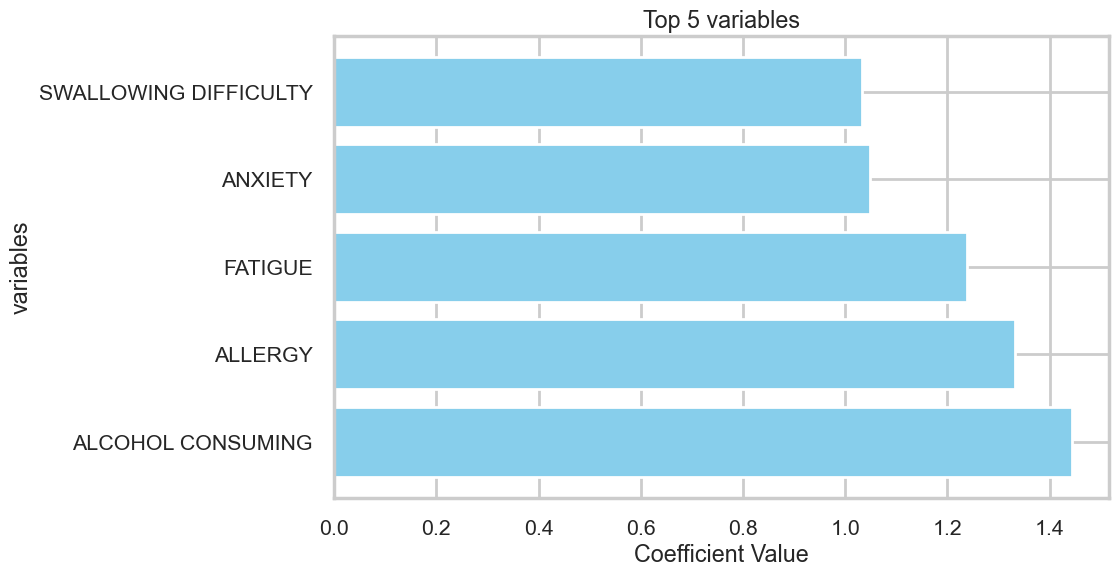

In [27]:
# Step 1: Data Preparation
X = data.drop('LUNG CANCER', axis=1)  # Features
y = data['LUNG CANCER']  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)

# Step 5: Print the most influential features
coefficients = model.coef_[0]

# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value in descending order
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print top variables
top_variables = 5
print(f"\nTop {top_variables} 5 variables:")
print(coefficients_df.head(top_variables))

plt.figure(figsize=(10, 6))
plt.title('Top 5 variables')
plt.xlabel('Coefficient Value')
plt.ylabel('variables')

# Plot horizontal bar chart
plt.barh(coefficients_df['Feature'][:top_variables], coefficients_df['Coefficient'][:top_variables], color='skyblue')

# Show plot
plt.show()


The first model we did is logistic regression as the nature of 
the dataset consists of categoerical values.This is the result of the logistic regression model where it has
a accuracy of 96% and the model is evaluated in the classification report using metrics such as precision, recall, f1-score, and support.
Below we have printed out the top 5 variables use by the model to predict lung cancer
In the barchat here, we can see that alcohol consuming is themost influential factor follow by allergy fatigue anxiety and
swallowing difficulty as the higher the coefficient value the more influence it has.

# Support Vector Machine MODEL


Support Vector Machines (SVM) are another class of powerful and versatile machine learning model suited for classification tasks and performing "yes" and "no" outcomes like predicting if there a individual has lung cancer or not.

Another reason why we chose SVM was that it works well with smaller datasets and datasets that have high number of variables such as our datasets. Thus we decided to choose SVM given our current dataset which is not only small in size and has a high number of variables.


Top Variables:
COUGHING
ALCOHOL CONSUMING
PEER PRESSURE
FATIGUE
ALLERGY

Confusion Matrix:
 [[ 27  12]
 [  8 262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        39
           1       0.96      0.97      0.96       270

    accuracy                           0.94       309
   macro avg       0.86      0.83      0.85       309
weighted avg       0.93      0.94      0.93       309


The Accuracy of Support Vector Machine is 93.53%


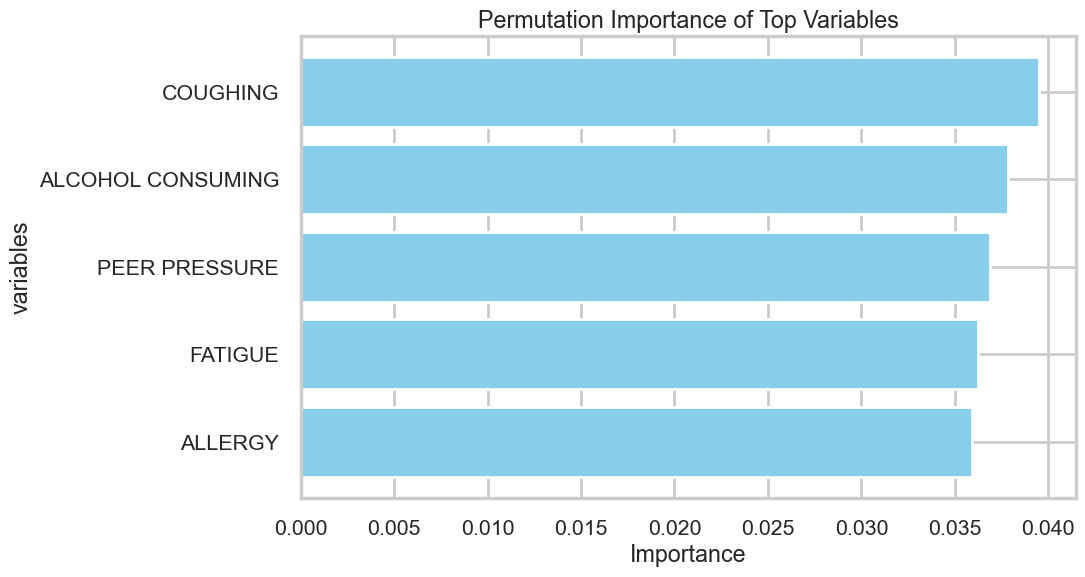

In [28]:
# Define the features and target variable
X = data.drop(columns=['LUNG CANCER'])  # Features
y = data['LUNG CANCER']  # Target variable

# Data processing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid.fit(X_scaled, y)

best_params = svm_grid.best_params_

# Train SVM model with best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_scaled, y)

# Compute permutation importance
perm_importance = permutation_importance(best_svm, X_scaled, y, n_repeats=10, random_state=42)

# Get indices of top variables
top_indices = perm_importance.importances_mean.argsort()[::-1][:5]

# Get corresponding feature names
top_variables = np.array(X.columns)[top_indices]

# Predictions
svm_pred = best_svm.predict(X_scaled)

# Confusion Matrix and Classification Report
svm_conf = confusion_matrix(y, svm_pred)
svm_report = classification_report(y, svm_pred)

# Accuracy
svm_acc = round(accuracy_score(y, svm_pred) * 100, ndigits=2)

# Print top variables
print("\nTop Variables:")
for var in top_variables:
    print(var)

print("\nConfusion Matrix:\n", svm_conf)
print("\nClassification Report:\n", svm_report)
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc}%")


# Barchart of top variables
plt.figure(figsize=(10, 6))
plt.barh(np.arange(5), perm_importance.importances_mean[top_indices], color='skyblue')
plt.yticks(np.arange(5), top_variables)
plt.title('Permutation Importance of Top Variables')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.gca().invert_yaxis()
plt.show()


The Second model we used is the support vector machine model.
in our output we printed out the top 5 variable. the confusion matrix and the classification report using metrics such as precision, recall, f1-score, and support.
The accuracy of SVM model is 93%.
in the barchat we can see that coughing is the most fluential factor in predicitng lung cancer using SVM follow by alcohol consumption,peer pressure fatigue and allergy.

# Conclusion

Using what we have learnt from out insights and machine learning models, we can conclude that smoking and alcohol consumption are one of the most influential variables affecting lung cancer. Based on the Machine Learning models, alcohol consumption was shown to be the top variable for logistic regression and second most influential variable in SVM. Secondly, from the insights we can see that more than 50% of smokers had lung cancer in our dataset. Lastly, from both our insights and machine learning models we can see that fatigue and coughing symptoms emerge as top variables in lung cancer cases. Thus, to have early detection of lung cancer, we recommend that individuals facing fatigue/coughing symptoms for a prolonged period to go for a hospital checkup. To reduce the lung cancer, individuals reduce their alcohol consumption whenever possible and stop smoking.